In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.utilities.outcomes import WinType
from triple_agent.reports.game_durations import game_durations
from triple_agent.reports.scl_set_scores import game_differential

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

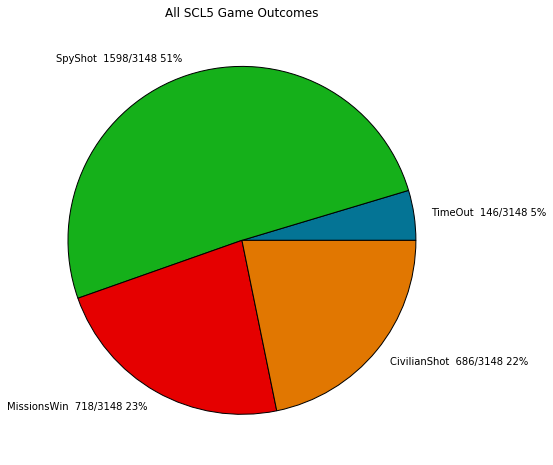

In [5]:
game_outcomes(scl5_replays, "All SCL5 Game Outcomes")

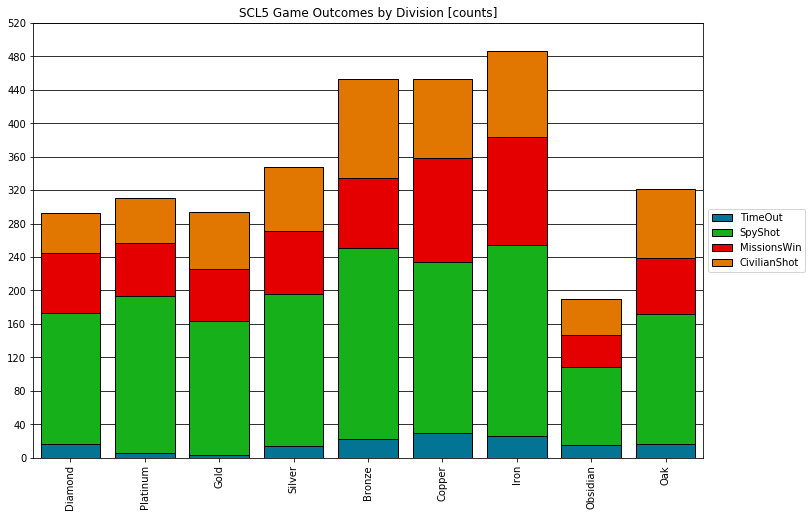

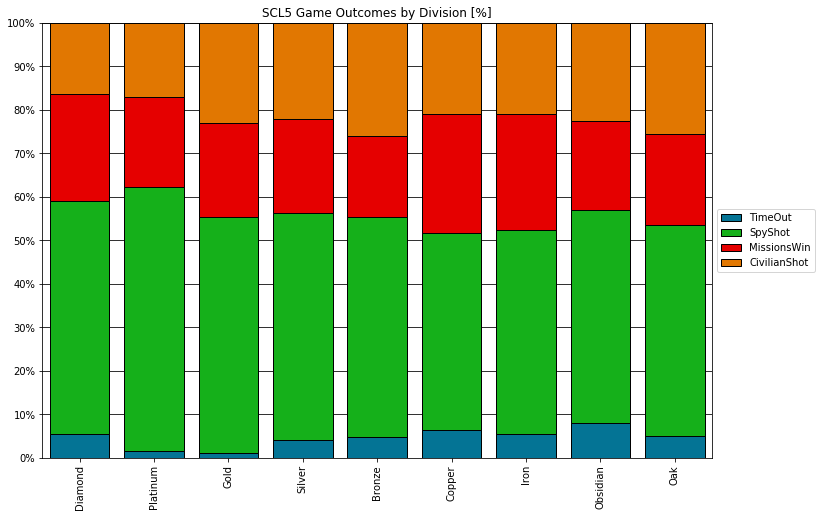

In [6]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: SCL5_DIVISIONS.index(g))

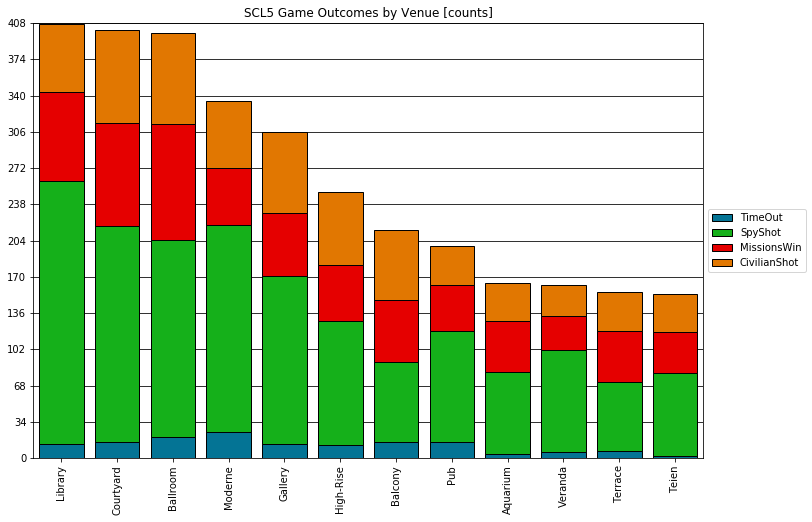

In [7]:
game_outcomes(scl5_replays,
    "SCL5 Game Outcomes by Venue",
    groupby=lambda g: g.venue,
    category_data_order=sum,
    percentile_plot=False)

In [8]:
def sort_by_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

In [9]:
def sort_by_sniper_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SniperWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

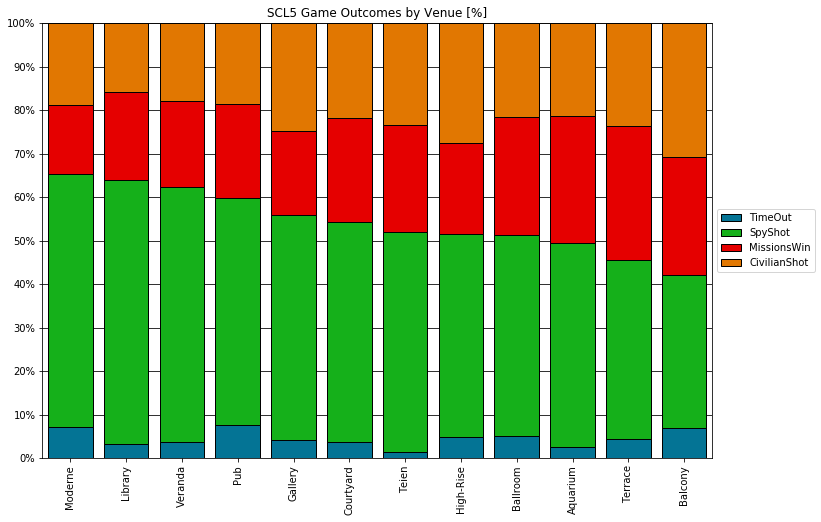

In [10]:
game_outcomes(scl5_replays,
    "SCL5 Game Outcomes by Venue",
    groupby=lambda g: g.venue,
    category_data_order=sort_by_spy_wins,
    counts_plot=False)

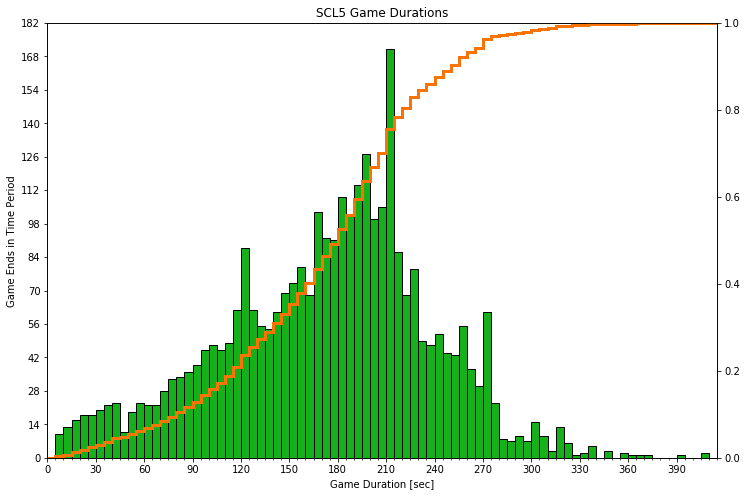

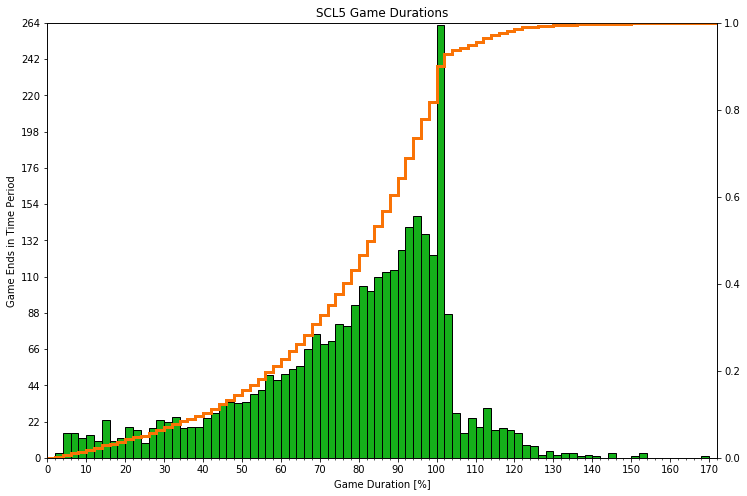

In [11]:
game_durations(scl5_replays, "SCL5 Game Durations")

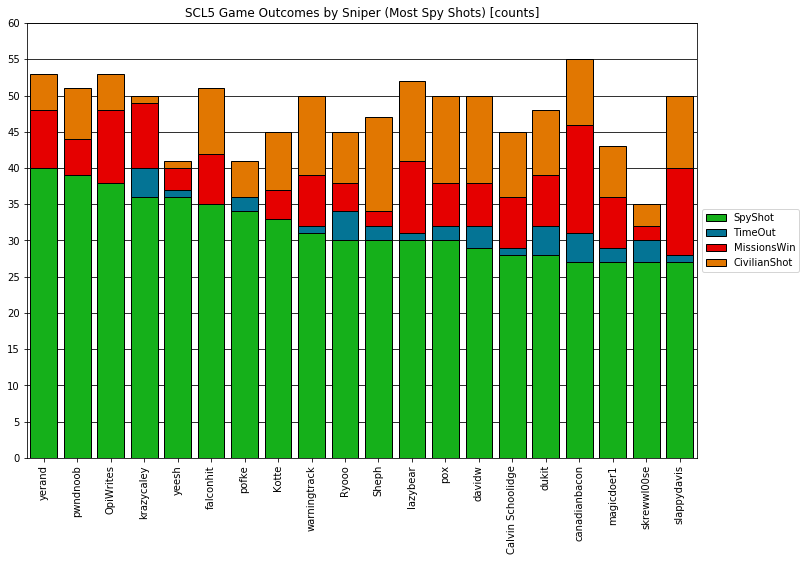

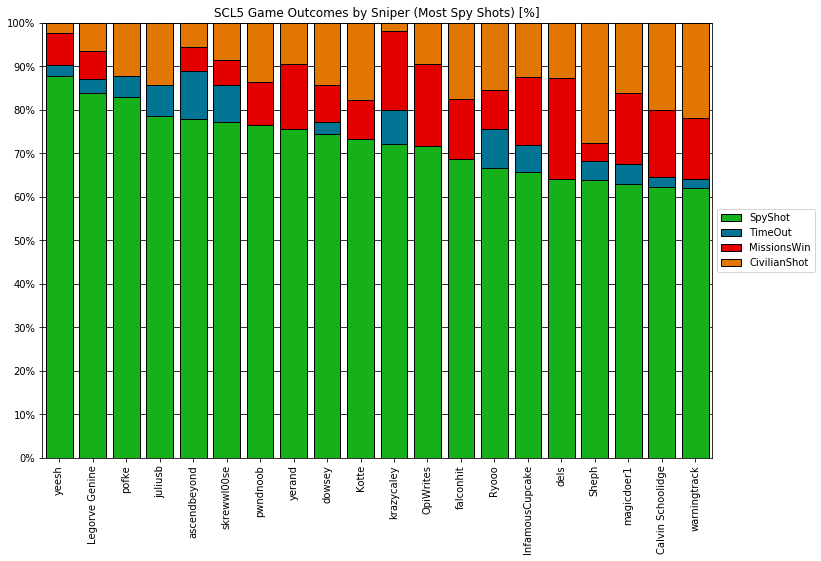

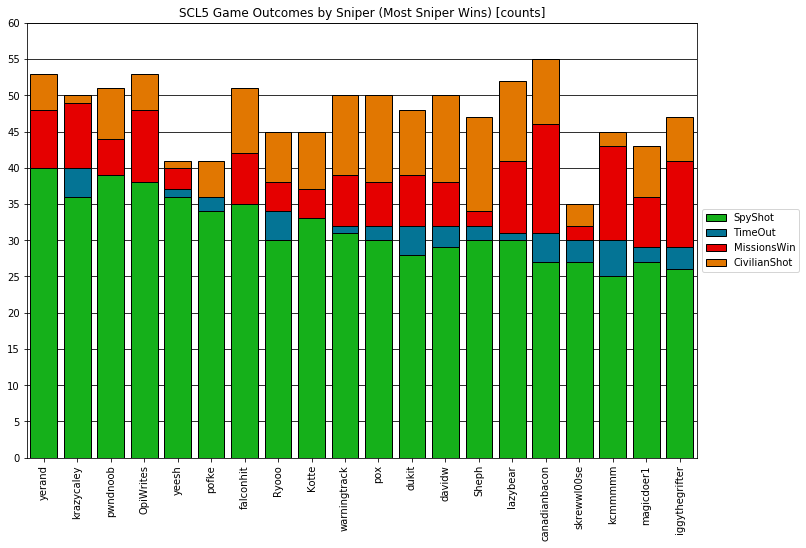

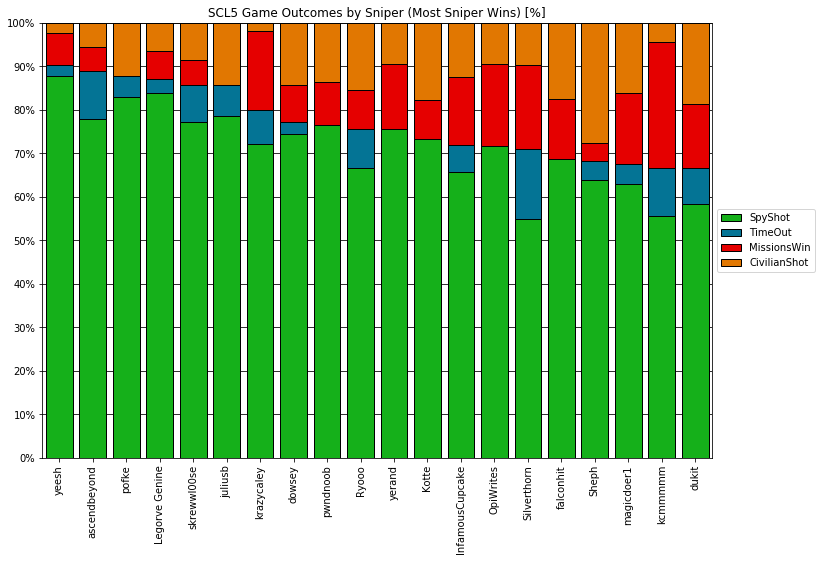

In [12]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Sniper (Most Spy Shots)",
    groupby=lambda g: g.sniper,
    category_data_order=WinType.SpyShot,
    data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
    limit=20
)
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Sniper (Most Sniper Wins)",
    groupby=lambda g: g.sniper,
    category_data_order=sort_by_sniper_wins,
    data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
    reversed_data_sort=True,
    limit=20
)

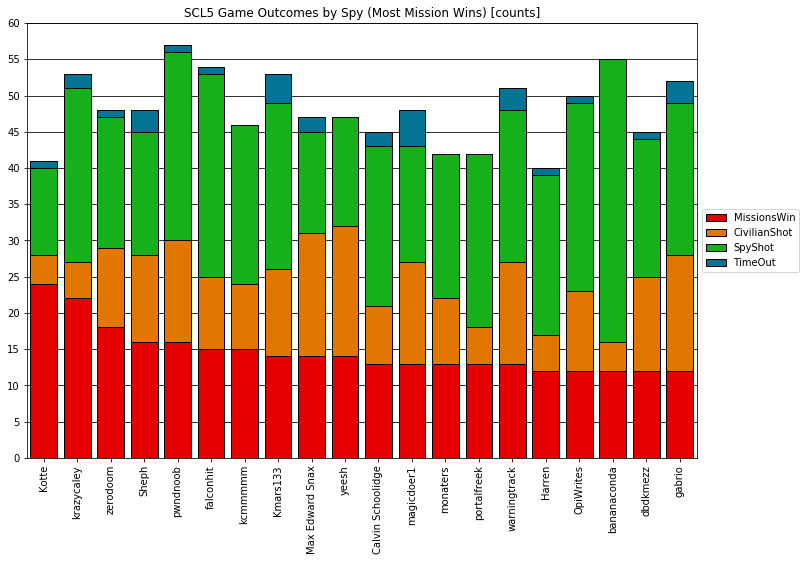

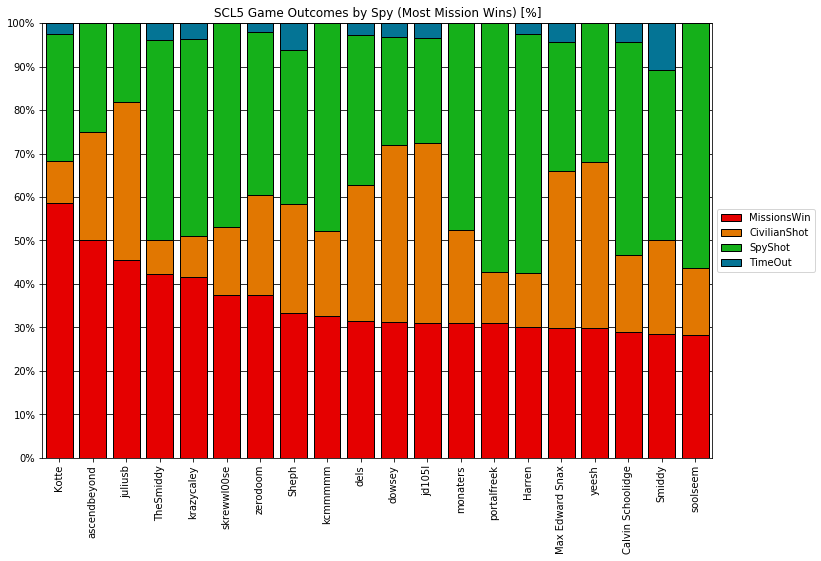

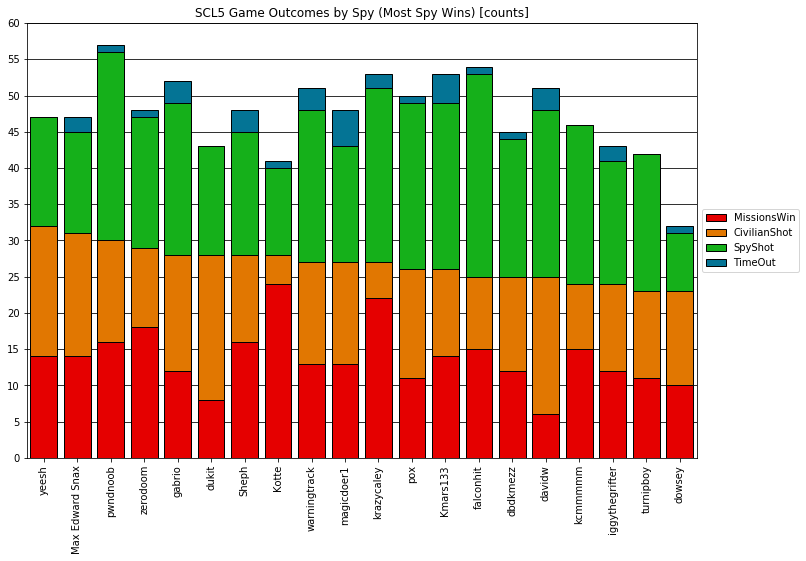

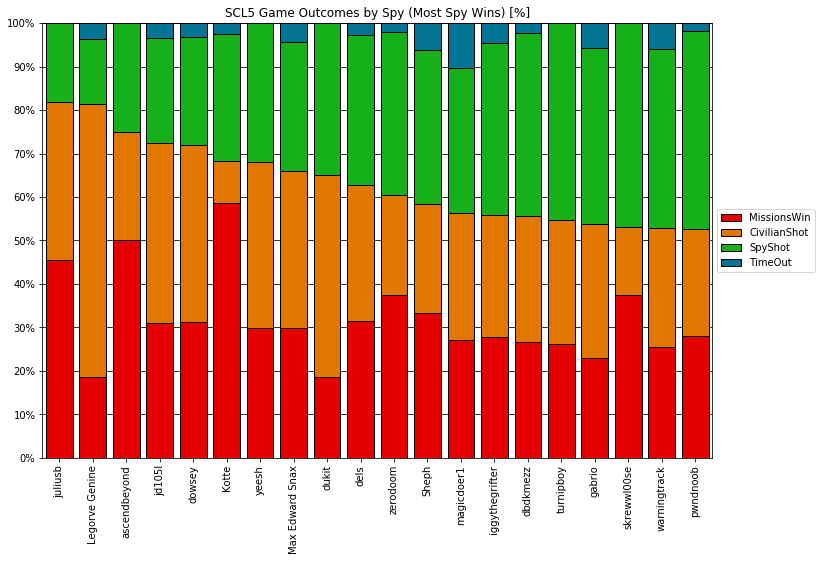

In [13]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Spy (Most Mission Wins)",
    groupby=lambda g: g.spy,
    category_data_order=WinType.MissionsWin,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    limit=20
)
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Spy (Most Spy Wins)",
    groupby=lambda g: g.spy,
    category_data_order=sort_by_spy_wins,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    reversed_data_sort=True,
    limit=20
)

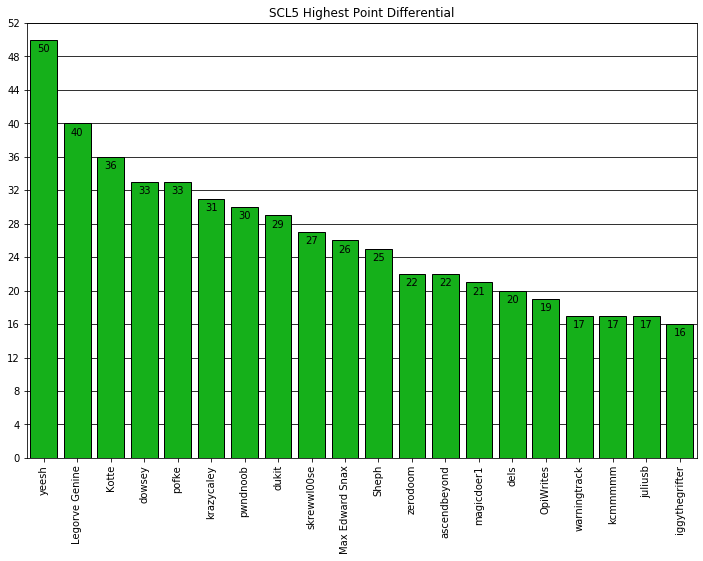

In [14]:
game_differential(
    scl5_replays,
    'SCL5 Highest Point Differential',
    percentile_plot=False,
    reversed_data_sort=True,
    limit=20,
    category_data_order=sum,
)